# 그래프와 시각화
- 정보의 시각화는 데이터 분석에서 중요한 업무
- 시각화는 특이값을 찾아내거나, 데이터 변형이 필요한지 확인하거나, 모델에 대한 아이디어를 찾기 위한 과정의 일부
- 현재 가장 많이 쓰이는 시각화 도구는 matplotlib 라이브러리
- matplotlib은 주로 2D 그래프를 위한 패키지로, 모든 운영체제의 다양한 GUI를 지원
- PDF, SVG, JPG, PNG, BMP, GIF 등 일반적으로 사용되는 포맷으로 그래프 저장

## matplotlib API 살펴보기

In [1]:
import matplotlib.pyplot as plt # matplotlib 라이브러리 임포트

[0 1 2 3 4 5 6 7 8 9]


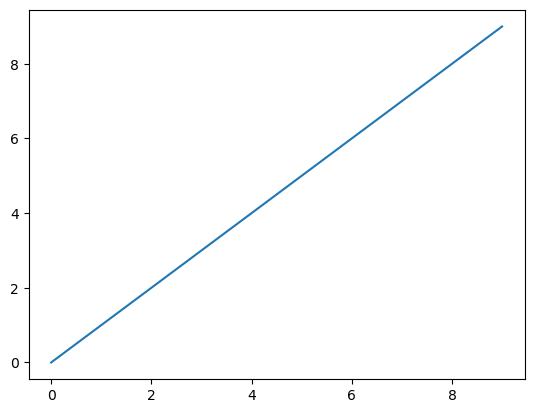

In [2]:
import numpy as np
data = np.arange(10)
print(data)
plt.plot(data) # plot() : x, y축 형태의 그래프 생성

### figure와 서브플롯
- add_subplot(nrows, ncols, index) : 
- nrows : 서브플롯의 행 개수(1 ~ 3까지)
- ncols : 서브플롯의 열 개수(1 ~ 3까지
- index : 서브플롯의 위치(1부터 왼쪽 위 순서. 총 4까지)  

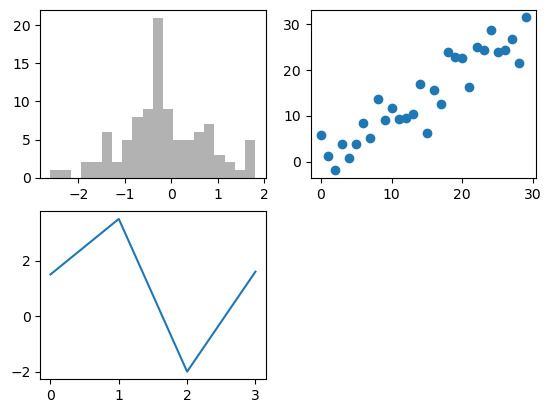

In [3]:
# 주피터 노트북을 사용할 때는 단일 셀에 그래프를 그리는 코드를 전부 입력
fig = plt.figure() # 빈 그래프 생성
ax1 = fig.add_subplot(2, 2, 1) # figure의 크기가 2 X 2, 4개의 subplot중 첫 번째를 선택
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3) 
# 히스토그램 그래프 생성
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30)) 
# 산점도 그래프 생성
ax3.plot([1.5, 3.5, -2, 1.6]) 
# 라인 그래프 생성

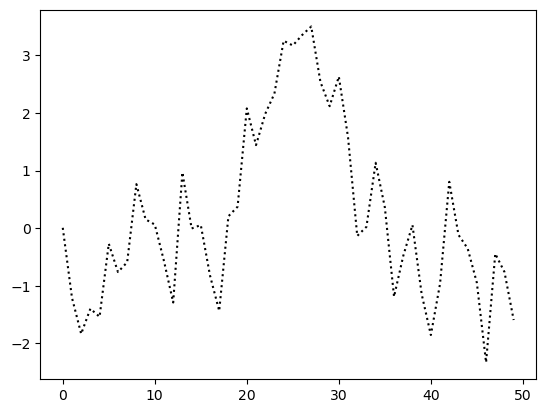

In [19]:
plt.plot(np.random.randn(50).cumsum(), 'k:') # 시계열 그래프 생성

In [8]:
plt.close('all') # 모든 plot 객체 닫기

#### pyplot.subplots 옵션
- nrows : 서브플롯의 행 수
- ncols : 서브플롯의 열 수
- sharex : 모든 서브플롯이 같은 x축 눈금을 사용하도록 설정
- sharey : 모든 서브플롯이 같은 y축 눈금을 사용하도록 설정
- subplot_kw : add_subplot을 사용하여 각 서브플롯을 생성할 때 사용할 키워드를 저장한 사전

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

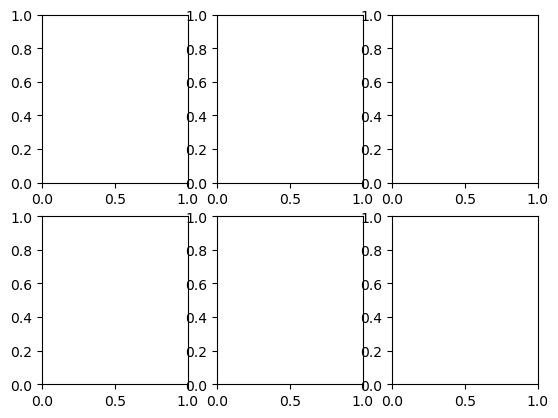

In [6]:
fig, axes = plt.subplots(2, 3) # 특정 배치에 맞게 여러 개의 서브플롯 생성
axes

#### 서브 플롯 간의 간격 조절
- 간격(spacing)과 여백(padding)을 조절
- subplots_adjust 메소드를 사용

In [7]:
# subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
# wspace : figure의 넓이에 대한 비율 조절
# hspace : figure의 높이에 대한 비율 조절

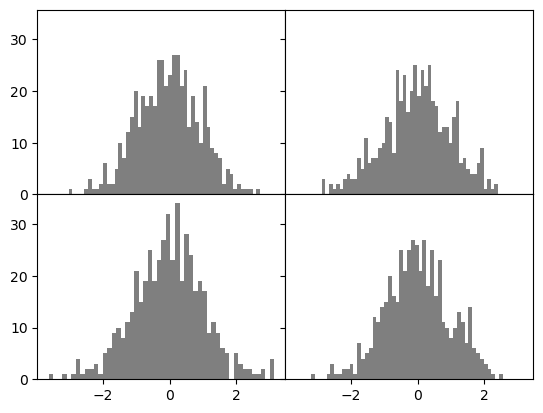

In [8]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

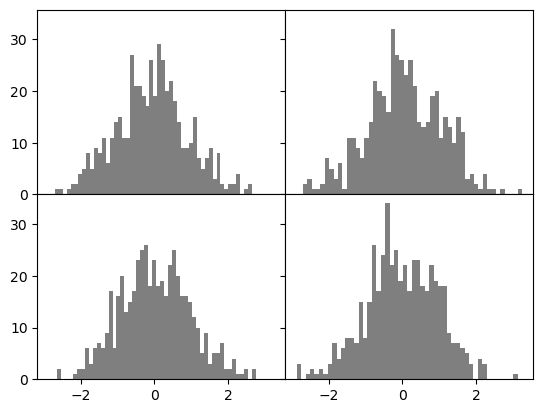

In [9]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
# sharex, sharey : 모든 서브플롯이 같은 x, y축 눈금을 사용
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 색상, 마커, 선 스타일
- plot 함수는 x, y 좌표값이 담긴 배열과 색상과 선 스타일을 나타내는 축약 문자열을 인자로 받음

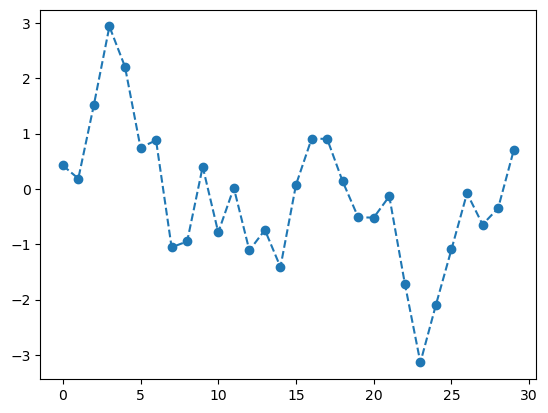

In [26]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'o--') # 'ko--' : dashed line style
# shift + tap으로 인자 확인

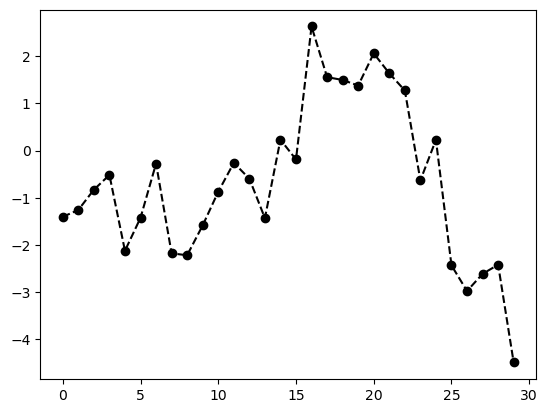

In [11]:
# 위와 같은 형태를 명시적으로 표현
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [12]:
plt.close('all')

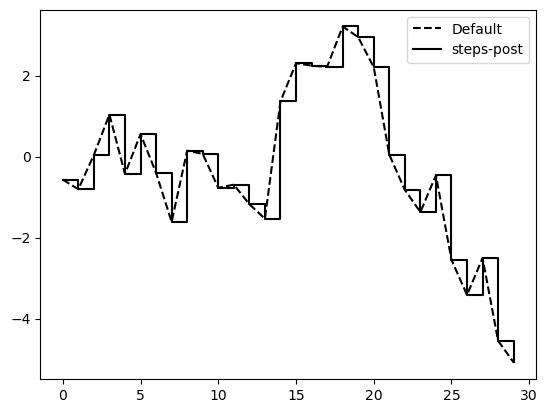

In [13]:
# 두 개의 plot을 하나의 그래프에 표현
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best') 

### 눈금, 라벨, 범례
- pyplot 인터페이스는 xlim, xticks, xticklabel 같은 메소드로 구성
- 이 메소드로 표의 범위를 지정하거나 눈금 위치, 눈금 이름을 조절

#### 제목, 축 이름, 눈금, 눈금 이름 설정

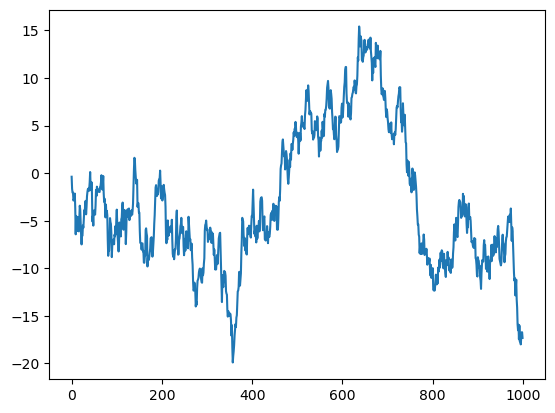

In [14]:
fig = plt.figure() # 빈 그래프 생성
ax = fig.add_subplot(1, 1, 1) # 서브플롯 생성
ax.plot(np.random.randn(1000).cumsum()) # 데이터 추가

In [15]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # set_xticks() : 전체 데이터 범위를 따라 눈금을 어디에 배치할지 지정
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
# set_xticklabels() : 눈금 이름 지정

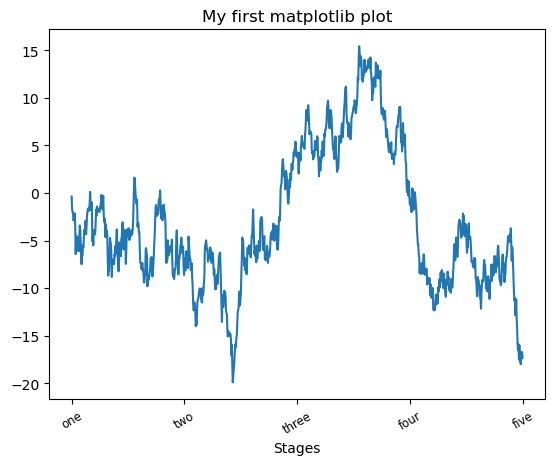

In [16]:
ax.set_title('My first matplotlib plot') # set_title() : plot 타이틀 지정
ax.set_xlabel('Stages') # set_xlabel() : x 축 이름 지정
ax.figure # subplot 출력

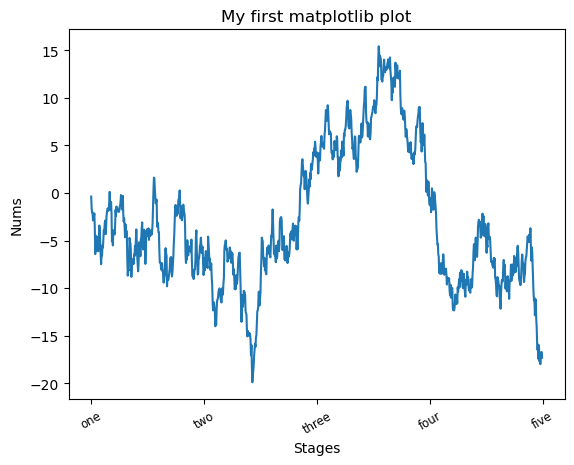

In [17]:
# set() 메소드를 사용하여 지정 가능
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages', 
    'ylabel' : 'Nums'
}
ax.set(**props)
ax.figure

#### 범례 추가

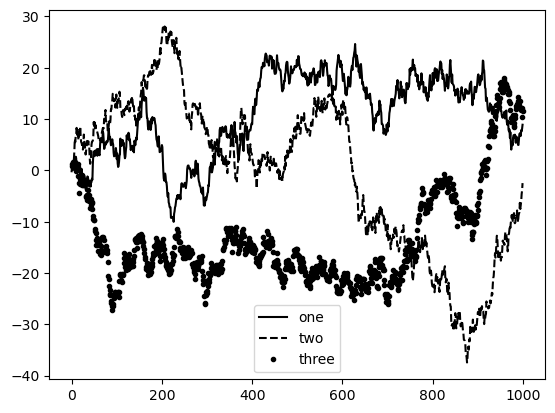

In [18]:
# label 설정 후 ax.legend() 메소드 사용하면 자동으로 범례 생성
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### 주석과 그림 추가하기

<class 'pandas.core.frame.DataFrame'>
1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64


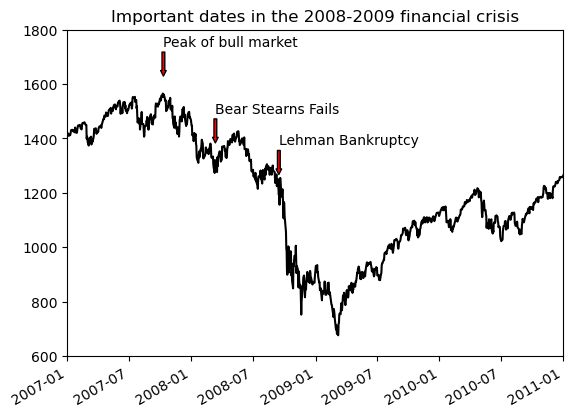

In [20]:
from datetime import datetime
import pandas as pd
# 야후 파이낸스에서 얻은 2007 년부터의 S&P 500 지수 데이터로 그래프 생성
# 2008-2009년 사이에 있었던 재정위기 중 중요한 날짜를 주석으로 추가
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True) # csv 데이터 읽어오기
print(type(data))
spx = data['SPX']
print(spx)

spx.plot(ax=ax, style='k-')

# 주석 데이터 생성
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    # spx.asof(date) : 입력된 날짜의 spx 값 
    ax.annotate(label, xy=(date, spx.asof(date) + 75), # 화살표 xy 좌표
                xytext=(date, spx.asof(date) + 225), # text xy 좌표
                arrowprops=dict(facecolor='red', headwidth=4, width=2,
                                headlength=4), # 화살표 형태
                horizontalalignment='left', verticalalignment='top') # 주석 정렬
    # annotate() : 주석 생성

xmin = datetime(2007, 1, 1)
xmax = datetime(2011, 1, 1)
    
ax.set_xlim([xmin, xmax]) # x 축을 2007-2010 구간으로 확대
ax.set_ylim([600, 1800]) # y 축을 600 - 1800 구간으로 확대

ax.set_title('Important dates in the 2008-2009 financial crisis')
fig.savefig('test.pdf')

### 그래프 파일로 저장

In [21]:
plt.savefig('figpath.pdf') # pdf 포멧으로 저장.

<Figure size 640x480 with 0 Axes>

In [22]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight') # png로 저장

<Figure size 640x480 with 0 Axes>

## pandas에서 seaborn으로 그래프 그리기
- pandas는 Series와 DataFrame 객체를 간단하게 시각화할 수 있는 내장 메소드 seaborn을 제공

### 선 그래프

<Axes: >

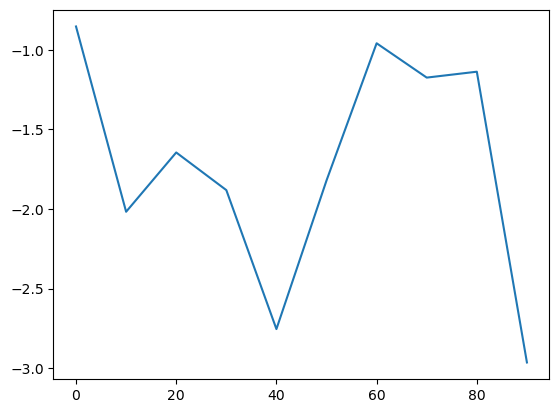

In [23]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot() # Series 객체의 내장 함수로 그래프 생성

<Axes: >

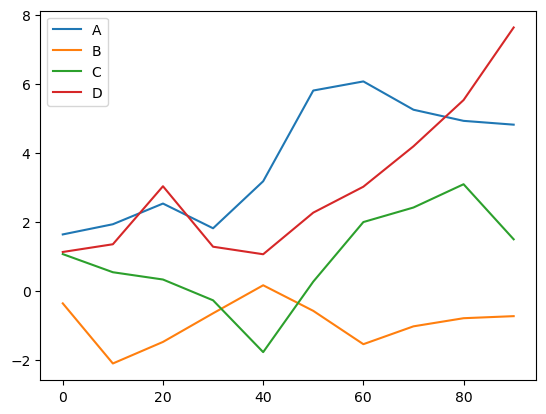

In [24]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot() # DataFrame 객체의 내장 함수로 그래프 생성

### 막대 그래프

<Axes: >

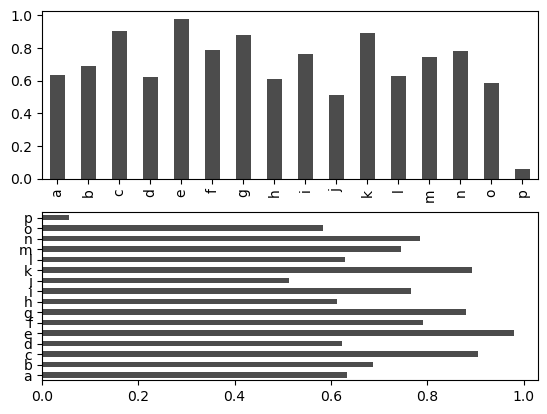

In [25]:
fig, axes = plt.subplots(2, 1) # 그래프 plot 2개 생성
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop')) # 정규분포 데이터 생성
data.plot.bar(ax=axes[0], color='k', alpha=0.7) # 수직 막대그래프
data.plot.barh(ax=axes[1], color='k', alpha=0.7) # 수평 막대그래프
# alpha : 투명도 

In [26]:
import pandas as pd
import numpy as np

Genus         A         B         C         D
one    0.929616  0.316376  0.183919  0.204560
two    0.567725  0.595545  0.964515  0.653177
three  0.748907  0.653570  0.747715  0.961307
four   0.008388  0.106444  0.298704  0.656411
five   0.809813  0.872176  0.964648  0.723685
six    0.642475  0.717454  0.467599  0.325585


<Axes: >

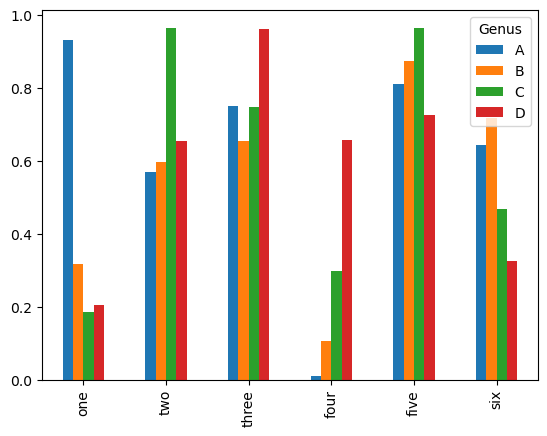

In [27]:
np.random.seed(12345) # 난수 생성 시 랜덤 데이터 초기화 설정
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
print(df)
df.plot.bar() # 막대그래프로 출력

<Axes: >

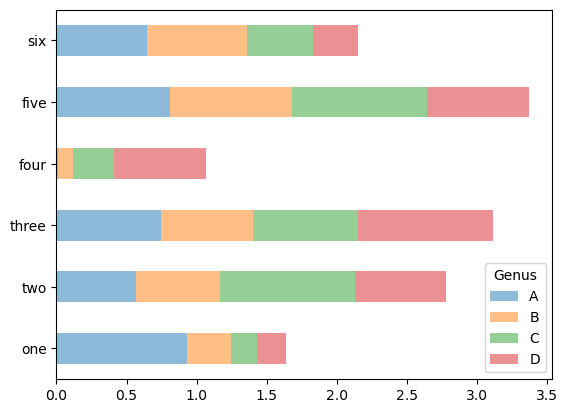

In [28]:
df.plot.barh(stacked=True, alpha=0.5) 
# barh() : 수평 막대그래프. stacked=True : 누적막대그래프 형식

In [29]:
plt.close('all')

In [31]:
# 요일별 파티 횟수 추출 및 파티 횟수 대비 팁 비율 보여주는 막대그래프 출력
tips = pd.read_csv('examples/tips.csv')
print(tips)
party_counts = pd.crosstab(tips['day'], tips['size']) 
# crosstab() : 교차분석된 데이터 프레임 리턴
# 날짜별 파티 횟수와 인원수별 파티 횟수 데이터 프레임 
party_counts

     total_bill   tip smoker   day    time  size
0         16.99  1.01     No   Sun  Dinner     2
1         10.34  1.66     No   Sun  Dinner     3
2         21.01  3.50     No   Sun  Dinner     3
3         23.68  3.31     No   Sun  Dinner     2
4         24.59  3.61     No   Sun  Dinner     4
..          ...   ...    ...   ...     ...   ...
239       29.03  5.92     No   Sat  Dinner     3
240       27.18  2.00    Yes   Sat  Dinner     2
241       22.67  2.00    Yes   Sat  Dinner     2
242       17.82  1.75     No   Sat  Dinner     2
243       18.78  3.00     No  Thur  Dinner     2

[244 rows x 6 columns]


size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


<Axes: xlabel='day'>

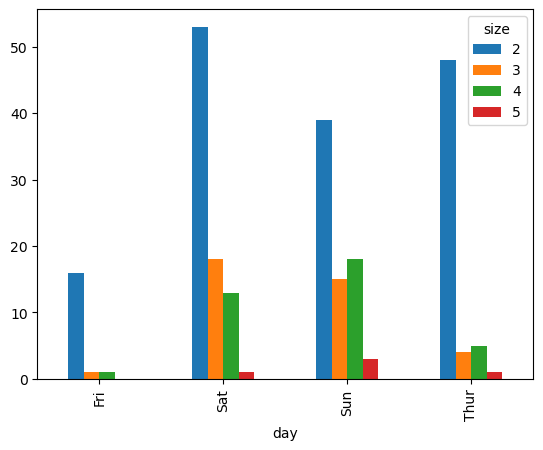

In [32]:
# 1인과 6인 파티는 제외
party_counts = party_counts.loc[:, 2:5]
party_counts.plot.bar()

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64
정규화 결과
size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241


<Axes: xlabel='day'>

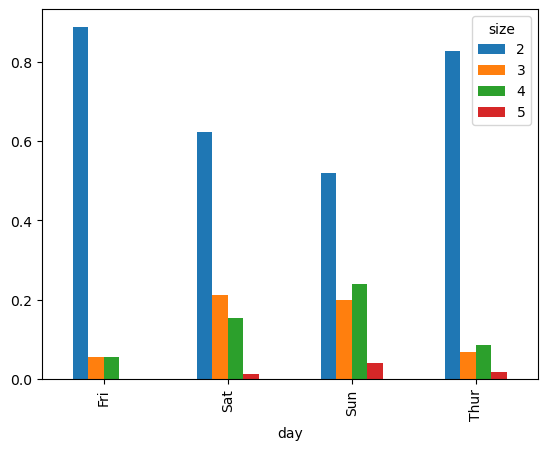

In [33]:
print(party_counts.sum(1)) # 각 행의 합
party_pcts = party_counts.div(party_counts.sum(1), axis=0) # (각 행의 값)/(각 행의 합) 
print('정규화 결과')
print(party_pcts)
party_pcts.plot.bar()

In [34]:
plt.close('all')

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


C:\Users\jhmoc\AppData\Local\Temp\ipykernel_5664\3811276990.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='tip_pct', y='day', data=tips, orient='h', ci = 95)


<Axes: xlabel='tip_pct', ylabel='day'>

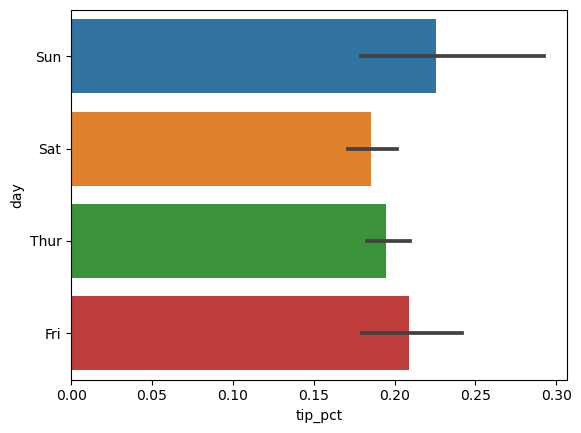

In [35]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) 
# 식사 비용 대비 팁의 비율
print(tips.head())
# 날짜별 tip_pct 평균 막대그래프 출력
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', ci = 95)
# 신뢰 구간(confidence interval) : 모든 데이터를 연구하는 것이 불가능하므로, 
# 샘플링된 데이터를 기반으로 모수의 범위를 추정하기 위해 사용
# 그래프의 검은 막대는 95%의 신뢰구간을 나타냄

In [36]:
plt.close('all')

<Axes: xlabel='tip_pct', ylabel='day'>

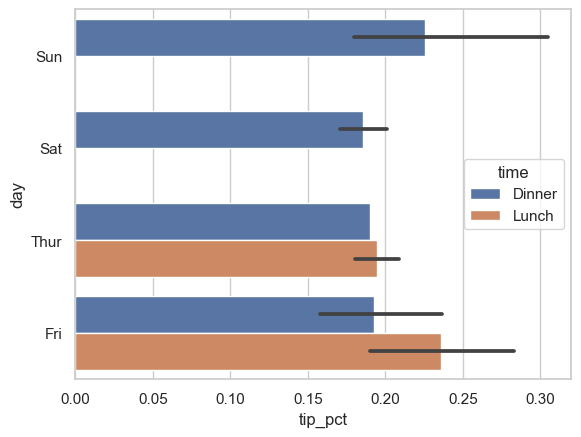

In [37]:
sns.set(style="whitegrid") # style : 스타일색 변경
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h') 
# hue : 추가 분류로 나타내는 기능

In [38]:
plt.close('all')

#### 연습문제
- 코로나 데이터 시각화하기


In [39]:
import pandas as pd
covid = pd.read_csv('examples/코로나_19_발생현황__국내__20210106143837.csv', encoding='euc-kr')
# 2021.01.04 ~ 2021.01.06 데이터 제거
print(covid.columns)
# 2021. 01 데이터 제외를 위해 제거해야할 열 확인
covid.columns[2:32] 
# 해당 열을 제외한 데이터 저장
covid = covid.drop(axis=1, columns = covid.columns[2:32])
covid # 2020년 4월 ~ 12월 사이의 코로나 데이터

Index(['구분별(1)', '구분별(2)', '2021. 01. 04', '2021. 01. 04.1', '2021. 01. 04.2',
       '2021. 01. 04.3', '2021. 01. 04.4', '2021. 01. 04.5', '2021. 01. 04.6',
       '2021. 01. 04.7', '2021. 01. 04.8', '2021. 01. 04.9', '2021. 01. 05',
       '2021. 01. 05.1', '2021. 01. 05.2', '2021. 01. 05.3', '2021. 01. 05.4',
       '2021. 01. 05.5', '2021. 01. 05.6', '2021. 01. 05.7', '2021. 01. 05.8',
       '2021. 01. 05.9', '2021. 01. 06', '2021. 01. 06.1', '2021. 01. 06.2',
       '2021. 01. 06.3', '2021. 01. 06.4', '2021. 01. 06.5', '2021. 01. 06.6',
       '2021. 01. 06.7', '2021. 01. 06.8', '2021. 01. 06.9', '2020. 04',
       '2020. 04.1', '2020. 04.2', '2020. 04.3', '2020. 04.4', '2020. 05',
       '2020. 05.1', '2020. 05.2', '2020. 05.3', '2020. 05.4', '2020. 06',
       '2020. 06.1', '2020. 06.2', '2020. 06.3', '2020. 06.4', '2020. 07',
       '2020. 07.1', '2020. 07.2', '2020. 07.3', '2020. 07.4', '2020. 08',
       '2020. 08.1', '2020. 08.2', '2020. 08.3', '2020. 08.4', '2020. 09',
   

,구분별(1),구분별(2),2020. 04,2020. 04.1,2020. 04.2,2020. 04.3,2020. 04.4,2020. 05,2020. 05.1,2020. 05.2,...,2020. 11,2020. 11.1,2020. 11.2,2020. 11.3,2020. 11.4,2020. 12,2020. 12.1,2020. 12.2,2020. 12.3,2020. 12.4
0,구분별(1),구분별(2),발생경로,발생경로,확진,격리해제,사망,발생경로,발생경로,확진,...,발생경로,발생경로,확진,격리해제,사망,발생경로,발생경로,확진,격리해제,사망
1,구분별(1),구분별(2),국내발생,해외유입,신규,신규,신규,국내발생,해외유입,신규,...,국내발생,해외유입,신규,신규,신규,국내발생,해외유입,신규,신규,신규
2,전체,소계,174,207,979,3492,82,511,192,703,...,6899,870,7769,3314,62,25727,842,26568,14646,374
3,시도별,서울,25,30,183,336,2,204,24,228,...,2721,81,2802,1039,15,10094,108,10203,3907,84
4,시도별,부산,4,8,18,29,0,5,5,10,...,204,13,217,96,8,1043,17,1060,743,34
5,시도별,대구,41,8,168,2074,57,23,8,31,...,48,10,58,55,3,562,8,570,278,2
6,시도별,인천,3,6,29,49,0,106,7,113,...,338,27,365,98,1,1409,22,1431,998,16
7,시도별,광주,1,2,10,13,0,0,2,2,...,169,16,185,68,0,369,16,385,279,3
8,시도별,대전,0,1,4,17,0,1,5,6,...,50,2,52,39,0,344,7,351,238,1
9,시도별,울산,1,2,4,17,0,0,9,9,...,26,9,35,13,0,461,15,476,273,24


In [40]:
# 1. 월 별 국내발생 확진자 수와 지역별로 구분하는 데이터 출력
print(covid.index)
covid.index = covid['구분별(2)']
print(covid.columns)
print(covid.columns.size)
print(list(range(2, 47, 5)))
covid_month_by_region = covid.iloc[2:21, list(range(2, 47, 5))]
covid_month_by_region
covid_month_by_region.index.name = None
covid_month_by_region.columns.name = None
covid_month_by_region = covid_month_by_region.astype('float')

RangeIndex(start=0, stop=32, step=1)
Index(['구분별(1)', '구분별(2)', '2020. 04', '2020. 04.1', '2020. 04.2',
       '2020. 04.3', '2020. 04.4', '2020. 05', '2020. 05.1', '2020. 05.2',
       '2020. 05.3', '2020. 05.4', '2020. 06', '2020. 06.1', '2020. 06.2',
       '2020. 06.3', '2020. 06.4', '2020. 07', '2020. 07.1', '2020. 07.2',
       '2020. 07.3', '2020. 07.4', '2020. 08', '2020. 08.1', '2020. 08.2',
       '2020. 08.3', '2020. 08.4', '2020. 09', '2020. 09.1', '2020. 09.2',
       '2020. 09.3', '2020. 09.4', '2020. 10', '2020. 10.1', '2020. 10.2',
       '2020. 10.3', '2020. 10.4', '2020. 11', '2020. 11.1', '2020. 11.2',
       '2020. 11.3', '2020. 11.4', '2020. 12', '2020. 12.1', '2020. 12.2',
       '2020. 12.3', '2020. 12.4'],
      dtype='object')
47
[2, 7, 12, 17, 22, 27, 32, 37, 42]


버전:  3.7.0
설치 위치:  C:\Users\jhmoc\anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\jhmoc\.matplotlib
캐시 위치:  C:\Users\jhmoc\.matplotlib
설정 파일 위치:  C:\Users\jhmoc\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
# 설정되어있는 폰트 사이즈
12.0
# 설정되어있는 폰트 글꼴
['NanumGothic']


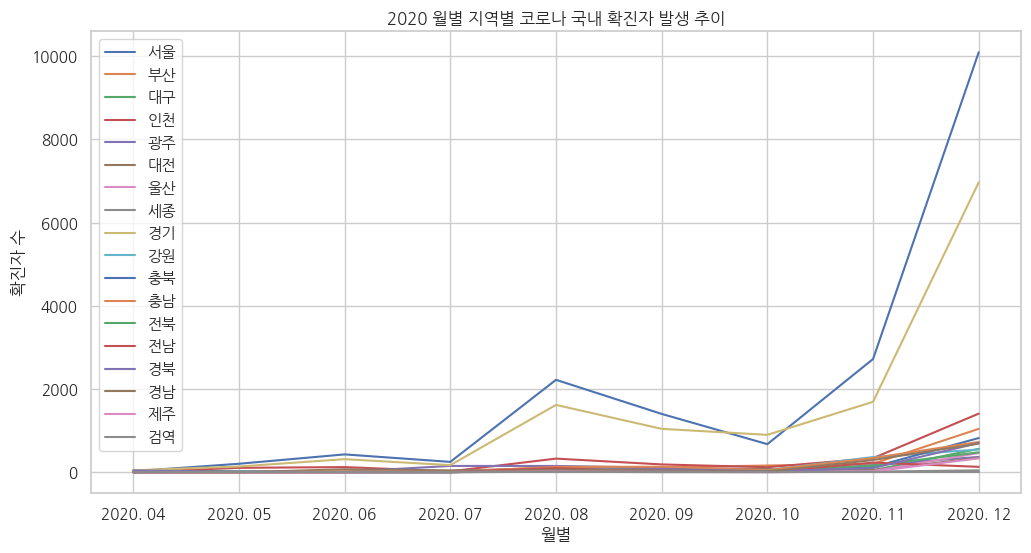

In [41]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
plt.rcParams['axes.unicode_minus'] = False
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())

# 나눔 폰트를 설정하기 전에 캐시 위치에 있는 파일을 삭제할 것
plt.rcParams['font.family'] = "NanumGothic"
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'])
plt.figure(figsize=(12, 6))
plt.plot(covid_month_by_region.iloc[1:, :].T)
plt.title("2020 월별 지역별 코로나 국내 확진자 발생 추이")
plt.ylabel("확진자 수")
plt.xlabel("월별")
plt.legend(covid_month_by_region.iloc[1:, :].T.columns)
plt.show()

#### 연습문제 1
- 월별 각 지역 중에 국내 최대 확진자 수 구하기

In [42]:
covid_month_by_region.iloc[1:, :].max()

2020. 04       47.0
2020. 05      204.0
2020. 06      429.0
2020. 07      249.0
2020. 08     2221.0
2020. 09     1402.0
2020. 10      899.0
2020. 11     2721.0
2020. 12    10094.0
dtype: float64

#### 연습문제 2
- 월별 각 지역의 국내 발생 평균 확진자 수 구하기

In [43]:
covid_month_by_region.iloc[1:, :].mean()

2020. 04       9.666667
2020. 05      28.388889
2020. 06      56.166667
2020. 07      38.500000
2020. 08     289.888889
2020. 09     192.555556
2020. 10     120.611111
2020. 11     383.277778
2020. 12    1429.111111
dtype: float64

#### 연습문제 3
- 2020 월별 성별 코로나 국내 확진자 발생 추이 그래프로 나타내기

#### 연습문제 4
- 2020 월별 연령별 코로나 국내 확진자 발생 추이 그래프로 나타내기